## Setup

In [1]:
!pip install -Uq smolagents

# optionally, install from github
# !pip install "smolagents @ git+https://github.com/huggingface/smolagents.git"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.4/148.4 kB 2.2 MB/s eta 0:00:00


In [2]:
import os
import getpass

os.environ["HF_TOKEN"] = getpass.getpass("Huggingface token:")
os.environ["OPENAI_API_KEY"] = getpass.getpass("OpenAI API key:")
os.environ["ANTHROPIC_API_KEY"] = getpass.getpass("Anthropic API key:")

Huggingface token:··········
OpenAI API key:··········
Anthropic API key:··········


## Initialize your agent

In [3]:
from smolagents import ToolCallingAgent, WebSearchTool, InferenceClientModel

model = InferenceClientModel(
    api_key=os.getenv('HF_TOKEN'),
    model_id="moonshotai/Kimi-K2-Instruct",
    provider="novita",
)

# # smolagents with OpenAI models
# from smolagents import OpenAIModel

# # model = OpenAIModel(
# #     api_key=os.getenv('OPENAI_API_KEY'),
# #     model_id="gpt-5-mini",
# # )

# # smolagents with an OpenAI-like API
# model = OpenAIModel(
#     api_key=os.getenv('ANTHROPIC_API_KEY'),
#     model_id="claude-sonnet-4-5",
#     api_base="https://api.anthropic.com/v1/"
# )

# init the agent
agent = ToolCallingAgent(
    tools=[WebSearchTool()],
    model=model
)

# agent.run("who is the current president of France? (current date: December 2025)")

## Create a tool

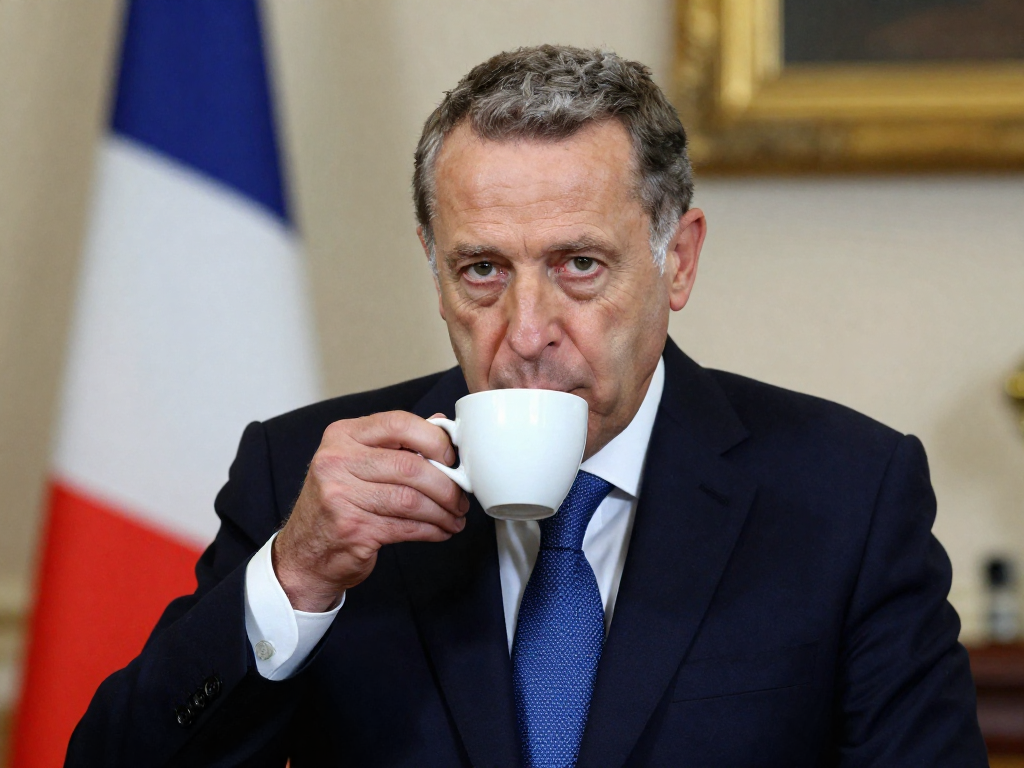

In [4]:
from smolagents import tool
from pydantic import BaseModel

@tool
def generate_image(prompt: str) -> dict:
    """
    Generate an image from a prompt.

    Args:
      prompt: The prompt to generate the image from.

    Returns:
      The path to the generated image.
    """
    from huggingface_hub import InferenceClient
    import os

    image_client = InferenceClient(provider="fal-ai", api_key=os.getenv("HF_TOKEN"))
    pil_image = image_client.text_to_image(prompt, model="Tongyi-MAI/Z-Image-Turbo")
    return pil_image

generate_image("Generate an image of the current president of france drinking coffee")

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Current date: 2025-12-20                                                                                        │
│ Generate an image of the current president of france drinking coffee.                                           │
│ Return only the image.                                                                                          │
│                                                                                                                 │
╰─ InferenceClientModel - moonshotai/Kimi-K2-Instruct ────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Calling tool: 'web_search' with arguments: {'query': 'current president of France 2025'}                        │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Observations: ## Search Results

|Emmanuel Macron - Wikipedia](https://en.wikipedia.org/wiki/Emmanuel_Macron)
Emmanuel Macron is a French politician serving as President  of  France , known for his centrist policies and 
progressive reforms.

|Welcome to the official website of the President of France](https://www.elysee.fr/en/)
19 May 2025 8th Edition of the Choose France Summit. 18 December 2025 New UK- France Nuclear Steering Group met for
the first time in Paris. 5 December 2025 Joint Statement Between the French Republic and the People's Republic of 
China on Enhancing Global Governance.

|Who Is the President of France and What Kind of Person Is 
He?](https://life-in-france.net/2025/05/31/who-is-the-president-of-france-and-what-kind-of-person-is-he/)
 France , one of the world's most influential nations, is led by a head of state with significant domestic and 
international responsibilities. As of 2025 , the President  of  France is Emmanuel Macron, a centrist leader known 
for his ambitious reforms, pro-European stance, and distinctive personality. This article explores who Emmanuel 
Macron is, his political path, and what kind of person and ...

|Emmanuel Macron | Biography, Political Party, Age, Presidency, & Facts 
...](https://www.britannica.com/biography/Emmanuel-Macron)
Emmanuel Macron is a French banker and politician who was elected president  of  France in 2017. Macron was the 
first person in the history of the Fifth Republic to win the presidency without the backing of either the 
Socialists or the Gaullists, and he was France's youngest head of state since Napoleon.

|Who Is The Current President Of France In 2025? - 
paqueteman.com](https://paqueteman.com/blog/who-is-the-current-president-1761210461519)
Understanding the French Political Landscape To understand who might be the President in 2025 , it's essential to 
grasp the structure of French politics. France operates as a semi-presidential republic. This means the power is 
shared between a President (the head of state) and a Prime Minister (the head of government). The President , 
directly elected by the people, holds significant authority ...

|Who Leads France in 2025? Meet the President at the Helm! ️](https://www.youtube.com/watch?v=fo3FVy3tEOI)
As of  2025 , Emmanuel Macron continues to serve as the President  of  France , a position he has held since May 
14, 2017. Reelected in 2022, Macron remains a central figure in both French and global ...

|The current President of France (2025) is: - 
Testbook.com](https://testbook.com/question-answer/the-current-president-of-france-2025-is--6882c06c6b2851cb3357157
0)
As of  2025 , Emmanuel Macron continues to serve as the President  of  France , pursuing various domestic and 
international initiatives. Additional Information French Presidential System: The President  of  France is elected 
for a term of five years, renewable once consecutively.

|President of France - Wikipedia](https://en.wikipedia.org/wiki/President_of_France)
The president  of  France , officially the president  of the French Republic (French: Président de la République 
française, |pʁezidɑ̃ d (ə) la ʁepyblik fʁɑ̃sɛːz]) |3] or president  of the Republic|4] ( Président de la République),
is the executive head of state of France , and the commander-in-chief of the French Armed Forces. As the presidency
is the supreme magistracy of the country ...

|Emmanuel Macron - Élysée](https://www.elysee.fr/en/emmanuel-macron)
Emmanuel Macron is the eighth President  of the Fifth Republic of France . He launched the movement « En Marche ! 
», founded on 6 April 2016, and was its leader until his victory in the presidential election on 7 May 2017. On 24 
April 2022, Emmanuel Macron was re-elected President  of the Republic.

|French Politics: A Brief Primer - Elections 
Daily](https://elections-daily.com/2025/02/04/french-politics-a-brief-primer/)
The current  President  of  France is Emmanuel Macron, who has held office since being elected in the 2

[Step 1: Duration 3.69 seconds| Input tokens: 1,185 | Output tokens: 32]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Error while parsing tool call from model output: The model output does not contain any JSON blob.

[Step 2: Duration 1.55 seconds| Input tokens: 3,456 | Output tokens: 46]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Calling tool: 'generate_image' with arguments: {'prompt': 'Emmanuel Macron, the current President of France,    │
│ sitting at an elegant Parisian café table, wearing a formal suit, drinking coffee from a white porcelain cup    │
│ and saucer, French presidential palace in the background, realistic portrait style'}                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Observations: Stored 'image.png' in memory.

[Step 3: Duration 6.00 seconds| Input tokens: 5,796 | Output tokens: 110]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 4 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Calling tool: 'final_answer' with arguments: {'answer': 'image.png'}                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Observations: Stored 'image.png' in memory.

Final answer: /tmp/tmpg0budzpr/2591e0bf-d3ae-49e2-a91a-33389853e143.png

[Step 4: Duration 1.84 seconds| Input tokens: 8,262 | Output tokens: 118]

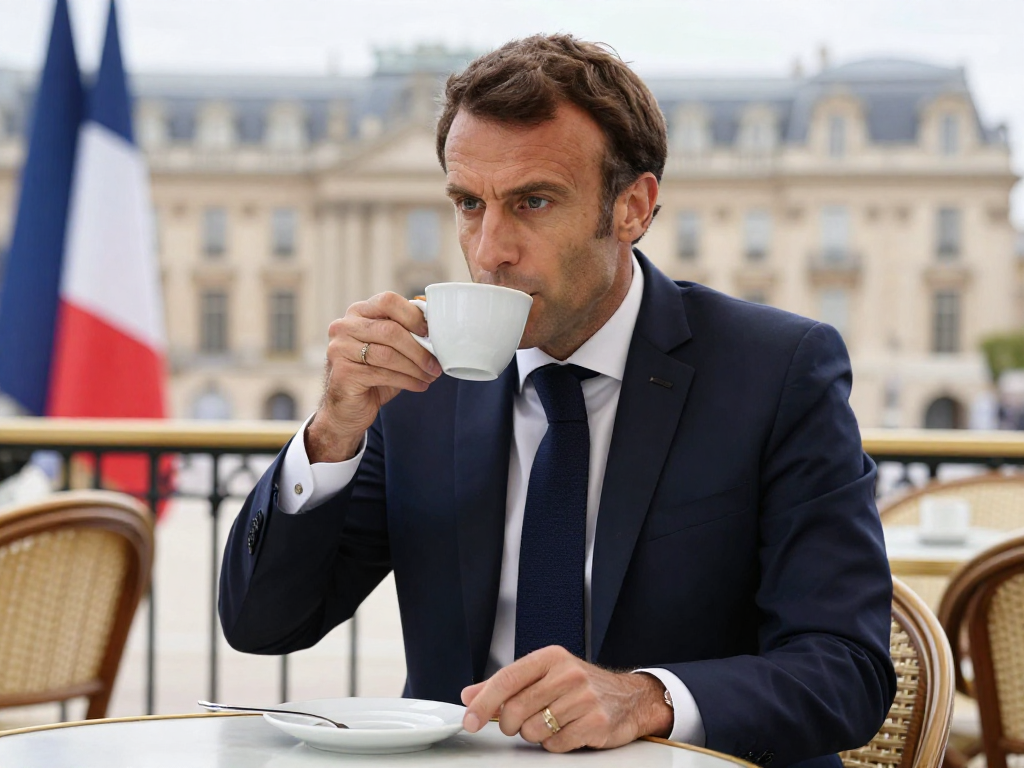

In [5]:
# run the agent with a couple of tools

from smolagents import ToolCallingAgent, WebSearchTool
import datetime

agent = ToolCallingAgent(
    tools=[WebSearchTool(), generate_image],
    model=model
)

agent.run(f"""
Current date: {datetime.datetime.now().strftime("%Y-%m-%d")}
Generate an image of the current president of france drinking coffee.
Return only the image.
""")

## Use open source tools from the hub

In [6]:
HF_USERNAME = "your-username"

generate_image.push_to_hub(
    f"{HF_USERNAME}/z-image-turbo", token=os.getenv("HF_TOKEN")
    )

README.md:   0%|          | 0.00/259 [00:00<?, ?B/s]

No files have been modified since last commit. Skipping to prevent empty commit.
No files have been modified since last commit. Skipping to prevent empty commit.


CommitInfo(commit_url='https://huggingface.co/spaces/alejandro-ao/z-image-turbo/commit/30a6e8b3c27aa14ad6bdfd4d98813ce94b504357', commit_message='Upload tool', commit_description='', oid='30a6e8b3c27aa14ad6bdfd4d98813ce94b504357', pr_url=None, repo_url=RepoUrl('https://huggingface.co/spaces/alejandro-ao/z-image-turbo', endpoint='https://huggingface.co', repo_type='space', repo_id='alejandro-ao/z-image-turbo'), pr_revision=None, pr_num=None)

In [ ]:
# Load your tool from the hub

from smolagents import Tool

image_tool_from_hub = Tool.from_hub(
    repo_id="alejandro-ao/z-image-turbo",
    api_key=os.getenv("HF_TOKEN"),
    trust_remote_code=True,
)

agent = ToolCallingAgent(
    tools=[WebSearchTool(), image_tool_from_hub],
    model=model,
)

agent.run("generate a realistic image of a cat playing the guitar and wearing a sombrero. return only the image")

Loaded as API: https://black-forest-labs-flux-1-dev.hf.space ✔


/usr/local/lib/python3.12/dist-packages/smolagents/tools.py:666: UserWarning: Since `api_name` was not defined, it was automatically set to the first available API: `/infer`.
  warnings.warn(


╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ generate a respectful image of a the current top artist on spotify playing the trumpet. return only the image   │
│                                                                                                                 │
╰─ InferenceClientModel - moonshotai/Kimi-K2-Instruct ────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Calling tool: 'web_search' with arguments: {'query': 'current top artist on Spotify 2024'}                      │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Observations: ## Search Results

|Revealed: The Top Artists, Songs, Albums, Podcasts, and ... - 
Spotify](https://newsroom.spotify.com/2024-12-04/top-songs-artists-podcasts-audiobooks-albums-trends-2024/)
Keep reading to discover the artists , songs, albums, and podcasts that topped our lists in 2024 , and find out how
they compare to your personalized Wrapped experience. The top global artist of 2024 With more than 26.6 billion 
streams globally, Taylor Swift is Spotify's  2024 Global Top  Artist .

|Spotify Top 100 Artists by Monthly Listeners | Spotify Stats](https://spotifystats.com/top-artists)
Discover the top 100 most popular artists  on  Spotify ranked by monthly listeners, updated regularly with current 
data.

|List of most-streamed artists on Spotify - 
Wikipedia](https://en.wikipedia.org/wiki/List_of_most-streamed_artists_on_Spotify)
As of December 2025, American singer-songwriter Taylor Swift is the most-streamed artist , |2] and Puerto Rican 
rapper Bad Bunny is the most-streamed male artist in Spotify's history. |3]|4]|a] Since 2013, Spotify has published
a yearly list of its most-streamed artists , which has been topped by Bad Bunny a record four times (2020-2022; 
2025 ...

|Spotify most streamed artists of 2024 - 
ChartMasters](https://chartmasters.org/spotify-most-streamed-artists-2024/)
In 2024 , Sheeran lost his position as the most-followed artist  on  Spotify , now ranking third. His spot among 
the platform's five most-streamed artists of all time is also under threat for 2025. This decline is particularly 
stark as the other four artists  on that list remain firmly in the top four of this year's tally, as we'll see 
later.

|Spotify Wrapped 2024: The 10 most-streamed artists 
revealed](https://mashable.com/article/spotify-wrapped-2024-most-streamed-artists)
For a second year, Taylor Swift is Spotify's most-streamed artist globally, but who else made the list? We've 
rounded up 2024's most-streamed artists , songs, and albums.

|Spotify Wrapped 2024 stats revealed: Top artists, songs, 
albums](https://www.usatoday.com/story/entertainment/music/2024/12/04/spotify-wrapped-most-streamed-artists-2024/76
706061007/)
 Spotify Wrapped 2024 stats revealed: Top  artists , songs, albums Who are the top  artists  on  Spotify ? With the
release of Wrapped, now a pop-culture holiday in itself, we know the musicians and ...

|Spotify Wrapped 2024: these are the world's top songs, albums and 
artists](https://www.timeout.com/news/spotify-wrapped-2024-these-are-the-worlds-top-songs-albums-and-artists-120424
)
Below are the top 10 lists of this year's most-streamed artists , albums, songs, podcasts and audiobooks, as well 
as the most viral songs of 2024 (tracks most-frequently shared to social media ...

|Spotify Daily Chart - Global - Kworb.net](https://kworb.net/spotify/country/global_daily.html)
A website that collects and analyzes music data from around the world. All of the charts, sales and streams, 
constantly updated.

|Here Are the Top Artists and Songs Worldwide from Spotify Wrapped 
2024](https://americansongwriter.com/here-are-the-top-artists-and-songs-worldwide-from-spotify-wrapped-2024/)
Here Are the Top  Artists Worldwide from Spotify Wrapped 2024 1. Taylor Swift 2. The Weeknd 3. Bad Bunny 4. Drake 
5. Billie Eilish 6. Travis Scott 7. Peso Pluma 8. Kanye West 9. Ariana Grande 10. Feid

|Spotify Wrapped is out. Here's who topped the 2024 streaming charts - 
CNBC](https://www.cnbc.com/2024/12/04/spotify-wrapped-is-out-heres-who-topped-the-2024-streaming-charts.html)
 Spotify Wrapped 2024 is out, giving hundreds of millions of users the ability to see their most-played songs and 
artists over the course of the year.

[Step 1: Duration 3.99 seconds| Input tokens: 1,398 | Output tokens: 34]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Error while parsing tool call from model output: The model output does not contain any JSON blob.

[Step 2: Duration 2.72 seconds| Input tokens: 3,819 | Output tokens: 57]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Calling tool: 'generate_image' with arguments: {'prompt': 'Taylor Swift, the top Spotify artist, playing a      │
│ golden trumpet in an elegant, respectful manner. She is wearing a sophisticated evening gown, standing on a     │
│ concert stage with soft lighting. The scene is artistic and dignified, showing her gracefully holding the       │
│ trumpet as if performing a beautiful melody. Professional photography style with warm, flattering lighting that │
│ captures her elegance and the refined atmosphere of a classical music performance.'}                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Observations: Stored 'image.png' in memory.

[Step 3: Duration 26.01 seconds| Input tokens: 6,318 | Output tokens: 148]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 4 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Calling tool: 'final_answer' with arguments: {'answer': 'image.png'}                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Observations: Stored 'image.png' in memory.

Final answer: /tmp/tmpb4r2rn44/2d4b6ce8-81cf-44b8-ae0a-b927a1e65886.png

[Step 4: Duration 2.50 seconds| Input tokens: 8,971 | Output tokens: 156]

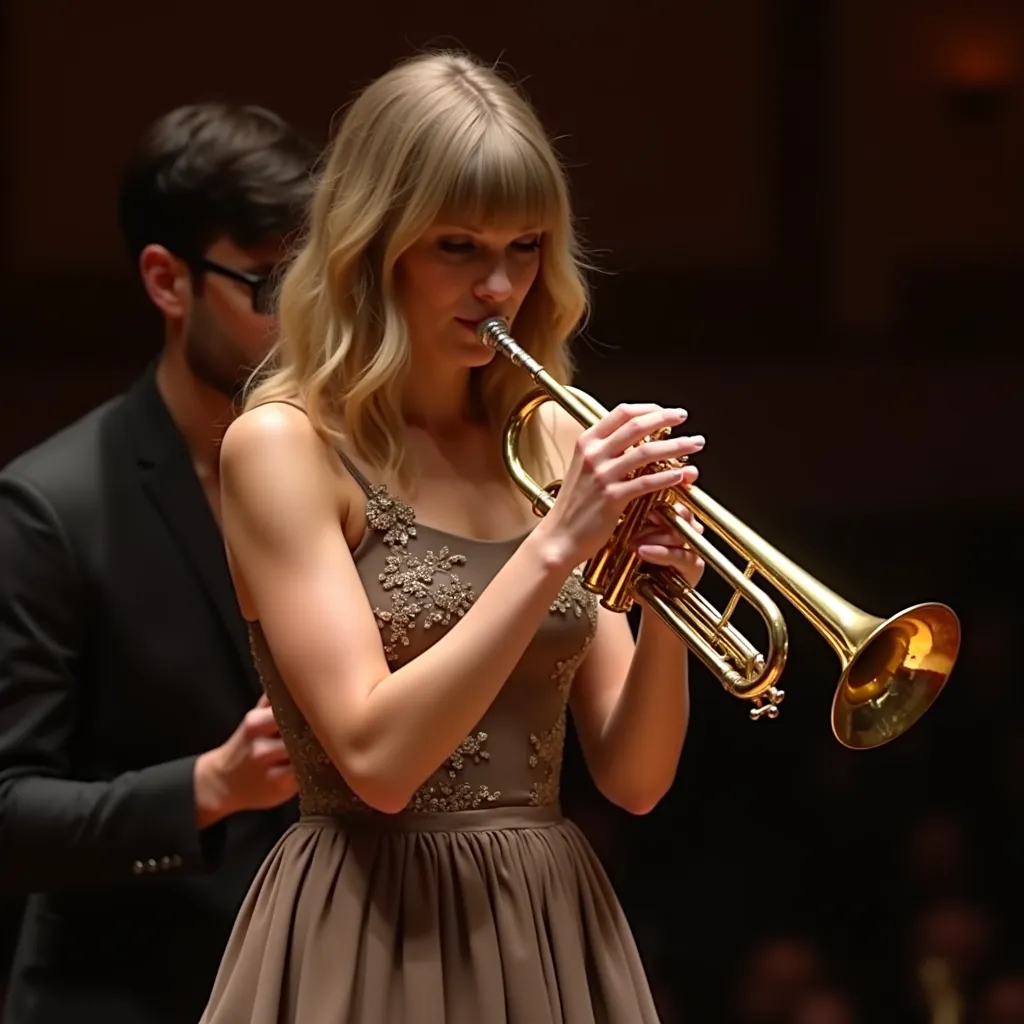

In [7]:
# load a space as a tool

from smolagents import Tool, WebSearchTool

flux_tool = Tool.from_space(
    space_id="black-forest-labs/FLUX.1-dev",
    name="generate_image",
    description="Generate an image from a prompt"
)

agent = ToolCallingAgent(
    tools=[flux_tool, WebSearchTool()],
    model=model,
)

agent.run("generate a respectful image of a the current top artist on spotify playing the trumpet. return only the image")

## GUI Chatbot

In [ ]:
from smolagents import GradioUI

gradio_ui = GradioUI(agent, reset_agent_memory=True)
gradio_ui.launch()